# Lab-4 Template

Answer questions in the designated cells

## Preparation

Use dataset provided in the eLearning

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [3]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('SBA_loans_train.csv')
X_test  = pd.read_csv('SBA_loans_test.csv')

In [4]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


**Review dataset**

In [5]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,22069,object,1,30,"{'LOS ANGELES': 4278, 'HOUSTON': 3801, 'NEW YO..."
1,State,51,object,2,3,"{'CA': 49031, 'TX': 26500, 'NY': 21508, 'FL': ..."
2,Zip,26044,int64,1,5,"{90015: 344, 10001: 328, 93401: 308, 33166: 26..."
3,Bank,4833,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 32382, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 44497, 'NC': 29717, 'IL': 24674, 'OH': ..."
5,NAICS,1279,int64,1,6,"{0: 75763, 722110: 10456, 722211: 7319, 811111..."
6,Term,372,int64,1,3,"{84: 86087, 60: 33770, 240: 32245, 120: 29056,..."
7,NoEmp,433,int64,1,4,"{1: 57553, 2: 51865, 3: 34228, 4: 27633, 5: 22..."
8,NewExist,3,float64,3,3,"{1.0: 241894, 2.0: 94857, 0.0: 389}"
9,CreateJob,180,int64,1,4,"{0: 236015, 1: 23537, 2: 21779, 3: 10849, 4: 7..."


In [6]:
X_train.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
count,337186.000000,337186.000000,337186.000000,337186.000000,337140.000000,337186.000000,337186.000000,337186.000000,337186.000000,3.371860e+05,337186.000000,3.371860e+05,3.371860e+05,337186.000000
mean,53839.723945,398565.095974,110.888984,11.310229,1.280204,8.590790,10.977176,2754.662685,0.758050,2.021301e+05,5.643016,1.935411e+05,1.501295e+05,0.175191
std,31173.277974,263305.463724,78.951681,68.753263,0.451661,239.591219,240.184246,12749.672453,0.646786,2.892966e+05,2232.801967,2.847135e+05,2.293072e+05,0.380131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02,0.000000
25%,27604.250000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.201250e+04,0.000000,3.500000e+04,2.125000e+04,0.000000
50%,55414.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,9.000000e+04,6.210000e+04,0.000000
75%,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.400000e+05,0.000000,2.270000e+05,1.750000e+05,0.000000
max,99999.000000,928120.000000,505.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.100000e+07,996262.000000,5.000000e+06,4.869000e+06,1.000000


In [7]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0


Explore levels and counts in the `RevLineCr` column. As we can see, some column values needs to be "cleaned"

In [8]:
desc_df.iloc[13]["Level_Values"]

{'N': 157494,
 '0': 96923,
 'Y': 75248,
 'T': 5797,
 'R': 7,
 '1': 6,
 '`': 2,
 '7': 1,
 '2': 1,
 ',': 1,
 'Q': 1,
 'A': 1,
 '-': 1}

# Question 1 - point

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [9]:
values_to_fill = {}
for col in X_train.drop(columns=['Defaulted']).columns:
    if pd.api.types.is_numeric_dtype(X_train[col].dtype):
        values_to_fill[col] = 0
    else:
        values_to_fill[col] = "Missing"
        

X_train.fillna(value=values_to_fill,inplace=True)
X_test.fillna(value=values_to_fill, inplace=True)

In [10]:
X_train.isna().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
Defaulted            0
dtype: int64

In [11]:
X_test.isna().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
Defaulted            0
dtype: int64

## Question 2 - 1 point

For the categorical variables listed below:  
- Use LabelEncoder to encode if number of levels is more than or equal to 20
- Use one-hot-encoding to encode if number of levels is less than 20. You can use Pandas or `sklearn` approach
- Take following steps with label/one-hot encoders:
    - Define encoder
    - Fit one-hot-encoder on training data only
    - Fit Label encoder on combination of train/test data or modify logic of Label encoder to handle unseen valid values
    - Transform Train/test datasets separately
- Give new columns names "Original-name"_le (for Label encoder), and "Original-name"_valid_value for one-hot-encoder

In [12]:
len_data = len(X_train)
for col in X_train.drop(columns=['Defaulted']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  22070  values
Column  State  has  52  values
Column  Bank  has  4834  values
Column  BankState  has  56  values
Column  RevLineCr  has  14  values
Column  LowDoc  has  8  values


In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from copy import deepcopy

#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in X_train.drop(columns=['Defaulted']).columns:
  if X_train[col].dtype == 'object':
    if X_train[col].nunique() < 20:
        print("One-hot encoding of ", col)
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        enc.fit(X_train[[col]])
        result = enc.transform(X_train[[col]])
        ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
        cat_enc_columns = cat_enc_columns + ohe_columns 
        result_train = pd.DataFrame(result, columns=ohe_columns)
        X_train = pd.concat([X_train, result_train], axis=1)
        '''Encode Testing'''
        result = enc.transform(X_test[[col]])
        result_test = pd.DataFrame(result, columns=ohe_columns)
        X_test = pd.concat([X_test, result_test], axis=1)
        cat_encoders[col] = [deepcopy(enc),"ohe"]
    else:
        print("Label Encode scaling of ", col)
        enc = LabelEncoder()
        enc.fit(list(X_train[col])+list(X_test[col]))
        new_col_name = col+"_le"
        X_train[new_col_name] = enc.transform(X_train[[col]])
        X_test[new_col_name] = enc.transform(X_test[[col]])
        cat_encoders[col] = [deepcopy(enc),"le"]
        cat_enc_columns.append(new_col_name)

        
    cols_to_drop.append(col)

Label Encode scaling of  City
Label Encode scaling of  State
Label Encode scaling of  Bank
Label Encode scaling of  BankState
One-hot encoding of  RevLineCr
One-hot encoding of  LowDoc


In [14]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("New encoded columns:", cat_enc_columns)

Train shape: (337186, 46)
Test shape: (112396, 46)
New encoded columns: ['City_le', 'State_le', 'Bank_le', 'BankState_le', 'RevLineCr_,', 'RevLineCr_-', 'RevLineCr_0', 'RevLineCr_1', 'RevLineCr_2', 'RevLineCr_7', 'RevLineCr_A', 'RevLineCr_Missing', 'RevLineCr_N', 'RevLineCr_Q', 'RevLineCr_R', 'RevLineCr_T', 'RevLineCr_Y', 'RevLineCr_`', 'LowDoc_0', 'LowDoc_A', 'LowDoc_C', 'LowDoc_Missing', 'LowDoc_N', 'LowDoc_R', 'LowDoc_S', 'LowDoc_Y']


## Question 3 - 1 point

Use MinMax scaler to scale numerical variables. Be careful not to scale new columns you have created as part of categorical features encoding. 
Add new columns containing scaled values as "Original_name"_sc

In [15]:
for col in X_train.drop(columns=['Defaulted']+cat_enc_columns):
    if pd.api.types.is_numeric_dtype(X_train[col].dtype):
        print('Column to process:', col)

Column to process: Zip
Column to process: NAICS
Column to process: Term
Column to process: NoEmp
Column to process: NewExist
Column to process: CreateJob
Column to process: RetainedJob
Column to process: FranchiseCode
Column to process: UrbanRural
Column to process: DisbursementGross
Column to process: BalanceGross
Column to process: GrAppv
Column to process: SBA_Appv


In [16]:
from sklearn.preprocessing import MinMaxScaler
num_scalers = {}
'''Scale only original numerical columns'''
for col in X_train.drop(columns=['Defaulted']+cat_enc_columns):
  if pd.api.types.is_numeric_dtype(X_train[col].dtype):
    print("MinMax scale of ", col)
    scaler = MinMaxScaler()
    scaler.fit(X_train[[col]])
    X_train[col+"_sc"] = scaler.transform(X_train[[col]])
    X_test[col+"_sc"] = scaler.transform(X_test[[col]])
    
    num_scalers[col] = [deepcopy(scaler),"MinMax"]
    cols_to_drop.append(col)

MinMax scale of  Zip
MinMax scale of  NAICS
MinMax scale of  Term
MinMax scale of  NoEmp
MinMax scale of  NewExist
MinMax scale of  CreateJob
MinMax scale of  RetainedJob
MinMax scale of  FranchiseCode
MinMax scale of  UrbanRural
MinMax scale of  DisbursementGross
MinMax scale of  BalanceGross
MinMax scale of  GrAppv
MinMax scale of  SBA_Appv


In [17]:
X_train

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_le,State_le,Bank_le,BankState_le,"RevLineCr_,",RevLineCr_-,RevLineCr_0,RevLineCr_1,RevLineCr_2,RevLineCr_7,RevLineCr_A,RevLineCr_Missing,RevLineCr_N,RevLineCr_Q,RevLineCr_R,RevLineCr_T,RevLineCr_Y,RevLineCr_`,LowDoc_0,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,Zip_sc,NAICS_sc,Term_sc,NoEmp_sc,NewExist_sc,CreateJob_sc,RetainedJob_sc,FranchiseCode_sc,UrbanRural_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1,10027,1,803,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.358114,0.669429,0.144554,0.0001,1.0,0.000227,0.000105,0.000000,0.5,0.002273,0.0,0.004960,0.004344
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1,19482,3,4997,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.852549,0.000000,0.166337,0.0003,1.0,0.000000,0.000000,0.000000,0.0,0.004727,0.0,0.010360,0.009591
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0,1058,21,381,23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.044010,0.348134,0.166337,0.0009,0.5,0.000000,0.000000,0.000010,0.5,0.013636,0.0,0.029961,0.026166
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1,740,3,3292,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.853239,0.778035,0.053465,0.0020,0.5,0.000000,0.002105,0.106251,1.0,0.016996,0.0,0.019961,0.010249
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0,8869,18,708,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.704037,0.000000,0.118812,0.0001,0.5,0.000000,0.000000,0.000010,0.5,0.004545,0.0,0.009960,0.008195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337181,ROCHESTER,MN,55901,TWIN CITIES-METRO CERT. DEVEL,MN,722410,240,8,1.0,4,8,1,2,0,N,388000.0,0.0,388000.0,388000.0,0,18364,23,4759,25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.559016,0.778358,0.475248,0.0008,0.5,0.000455,0.000842,0.000010,1.0,0.035273,0.0,0.077563,0.079669
337182,STATEN ISLAND,NY,10301,BANK OF AMERICA NATL ASSOC,NC,445110,36,4,2.0,0,4,0,1,Y,N,31500.0,0.0,31500.0,15750.0,0,20617,35,407,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.103011,0.479582,0.071287,0.0004,1.0,0.000000,0.000421,0.000000,0.5,0.002864,0.0,0.006260,0.003214
337183,Montgomeryville,PA,18936,UNITY BANK,NJ,311811,120,2,2.0,15,0,25650,1,N,N,720000.0,0.0,720000.0,540000.0,0,14449,39,4845,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.189362,0.335960,0.237624,0.0002,1.0,0.001705,0.000000,0.256503,0.5,0.065455,0.0,0.143966,0.110887
337184,HAYDEN,ID,83835,MOUNTAIN W. BANK A DIVISION OF,ID,441229,84,2,1.0,1,1,1,1,Y,N,210282.0,0.0,110000.0,55000.0,0,9094,13,3267,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.838358,0.475401,0.166337,0.0002,0.5,0.000114,0.000105,0.000010,0.5,0.019117,0.0,0.021961,0.011276


In [18]:
X_test

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_le,State_le,Bank_le,BankState_le,"RevLineCr_,",RevLineCr_-,RevLineCr_0,RevLineCr_1,RevLineCr_2,RevLineCr_7,RevLineCr_A,RevLineCr_Missing,RevLineCr_N,RevLineCr_Q,RevLineCr_R,RevLineCr_T,RevLineCr_Y,RevLineCr_`,LowDoc_0,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,Zip_sc,NAICS_sc,Term_sc,NoEmp_sc,NewExist_sc,CreateJob_sc,RetainedJob_sc,FranchiseCode_sc,UrbanRural_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc
0,RANTOUL,IL,61866,BUSEY BANK,IL,0,84,1,2.0,0,0,1,0,N,Y,42000.0,0.0,42000.0,33600.0,0,17999,14,789,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.618666,0.000000,0.166337,0.0001,1.0,0.000000,0.000000,0.00001,0.0,0.003818,0.0,0.008360,0.006880
1,BOISE,ID,83704,WELLS FARGO BANK NATL ASSOC,SD,0,84,7,1.0,0,0,1,0,N,N,15000.0,0.0,15000.0,13500.0,0,1744,13,4997,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.837048,0.000000,0.166337,0.0007,0.5,0.000000,0.000000,0.00001,0.0,0.001364,0.0,0.002960,0.002752
2,CAROL STREAM,IL,60188,"SOMERCOR 504, INC.",IL,0,240,19,1.0,15,0,1,0,N,N,497000.0,0.0,497000.0,497000.0,0,3044,14,4126,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.601886,0.000000,0.475248,0.0019,0.5,0.001705,0.000000,0.00001,0.0,0.045182,0.0,0.099364,0.102056
3,SOMERSWORTH,NH,3878,CITIZENS BANK NATL ASSOC,NH,235610,84,21,1.0,0,21,1,1,Y,N,20000.0,0.0,20000.0,10000.0,0,20063,31,1055,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.038780,0.253857,0.166337,0.0021,0.5,0.000000,0.002211,0.00001,0.5,0.001818,0.0,0.003960,0.002033
4,CHERRY HILL,NJ,8002,CITIZENS BANK NATL ASSOC,RI,541511,84,2,2.0,1,3,1,1,N,N,100000.0,0.0,100000.0,50000.0,0,3432,32,1055,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.080021,0.583449,0.166337,0.0002,1.0,0.000114,0.000316,0.00001,0.5,0.009091,0.0,0.019961,0.010249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112391,HURRICANE,WV,25526,"WESBANCO BANK, INC.",WV,0,60,6,1.0,0,0,1,0,N,Y,23269.0,0.0,24700.0,19760.0,0,9688,50,5008,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.255263,0.000000,0.118812,0.0006,0.5,0.000000,0.000000,0.00001,0.0,0.002115,0.0,0.004900,0.004038
112392,ADA,OK,74820,VISION BANK NATL ASSOC,OK,722211,78,2,1.0,10,0,1,2,0,N,120000.0,0.0,120000.0,60000.0,1,82,37,4937,39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.748207,0.778144,0.154455,0.0002,0.5,0.001136,0.000000,0.00001,1.0,0.010909,0.0,0.023961,0.012303
112393,LA MIRADA,CA,90638,BBCN BANK,CA,621999,78,1,2.0,0,0,0,1,N,N,20000.0,0.0,20000.0,17000.0,1,11130,4,668,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.906389,0.670171,0.154455,0.0001,1.0,0.000000,0.000000,0.00000,0.5,0.001818,0.0,0.003960,0.003471
112394,LOS ANGELES,CA,90021,CAPITAL ONE NATL ASSOC,VA,315212,84,3,1.0,4,3,0,1,N,N,25000.0,0.0,25000.0,12500.0,0,12013,4,857,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.900219,0.339624,0.166337,0.0003,0.5,0.000455,0.000316,0.00000,0.5,0.002273,0.0,0.004960,0.002547


## Question 4 - 3 points

Train `LogisticRegression` regression on the Train dataset. Score Test dataset. Report performance metrics for for both, Train and Test datasets:
- Accuracy

Identify probability threshold which produces best F1 score. Print following for the found threshold:
- F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
- Confusion matrix

Use `predict_proba` to get probabilities.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score


In [20]:
X_tr = X_train.drop(columns=['Defaulted']+cols_to_drop)
Y_tr = X_train.Defaulted

X_tst = X_test.drop(columns=['Defaulted']+cols_to_drop)
Y_tst = X_test.Defaulted


In [21]:
logreg = LogisticRegression().fit(X_tr, Y_tr)
y_pred = logreg.predict(X_tst)
prob = logreg.predict_proba(X_tst)
prob

array([[0.88047753, 0.11952247],
       [0.90289301, 0.09710699],
       [0.90377129, 0.09622871],
       ...,
       [0.83831193, 0.16168807],
       [0.83856003, 0.16143997],
       [0.90987676, 0.09012324]])

In [22]:
print(logreg.score(X_tr,Y_tr))
print(logreg.score(X_tst,Y_tst))

0.8248088592053051
0.8246645788106338


In [23]:
accuracy_score(Y_tst, y_pred)

0.8246645788106338

In [24]:
import numpy as np
from sklearn.metrics import f1_score,confusion_matrix


In [25]:
best_threshold = 0
best_f1 = 0
for threshold in np.arange(0.1,1.0,0.05):
    logreg = LogisticRegression(C=threshold)
    logreg.fit(X_tr, Y_tr)
    y_pred = logreg.predict(X_tst)
    f1 = f1_score(Y_tst, y_pred, average = 'weighted')
    if f1>best_f1:
        best_f1 = f1
        best_threshold = threshold
print("The best threshold is",best_threshold)
print("The F1_score is",best_f1)   

The best threshold is 0.20000000000000004
The F1_score is 0.7459751306295417


In [26]:
logreg_best = LogisticRegression(C=0.2).fit(X_tr, Y_tr)
y_pred_best = logreg_best.predict(X_tst)
f1_best = f1_score(Y_tst, y_pred_best, average = 'weighted')
confusion_matrix(Y_tst, y_pred_best)

array([[92602,    87],
       [19663,    44]], dtype=int64)

## Question 5 - 5 points

Train SVM (`from sklearn.svm import SVC`) classifier with following hyper-parameters. 
```
for degree in [2,3,4,5,7]:
    svm = SVC(kernel='poly', degree=degree, max_iter=700, verbose=False)
```    

Report:  
- F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
- Confusion matrix

What is the best degree from the weighted F1 stand point? 

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


0.2304380656485412
The confusion matrix is [[11662 81027]
 [ 2674 17033]]
0.2758615338004539
The confusion matrix is [[15039 77650]
 [ 2895 16812]]
0.19636533415582366
The confusion matrix is [[ 9036 83653]
 [ 1638 18069]]
0.11597832131894037
The confusion matrix is [[ 3737 88952]
 [  596 19111]]
0.14904344937156477
The confusion matrix is [[ 5856 86833]
 [ 1107 18600]]


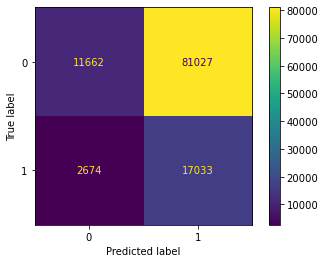

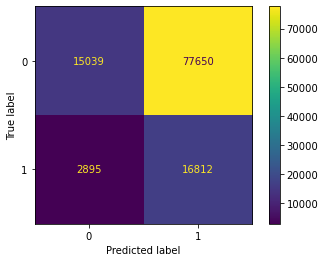

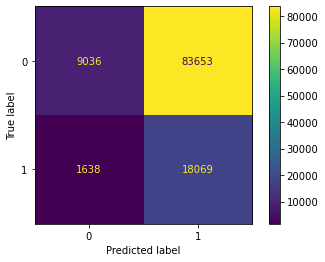

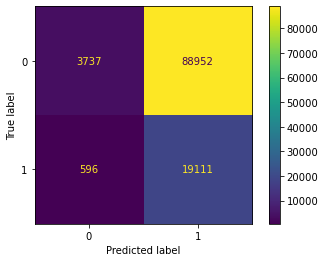

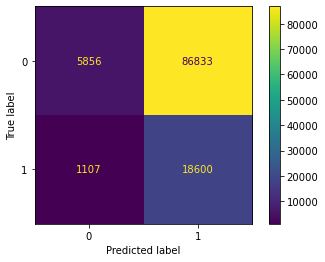

In [28]:
for degree in [2,3,4,5,7]:
    svm = SVC(kernel='poly', degree=degree, max_iter=700, verbose=False)
    svm.fit(X_tr,Y_tr)
    predictions = svm.predict(X_tst)
    print(f1_score(Y_tst, predictions, average='weighted'))
    cm = confusion_matrix(Y_tst, predictions, labels=svm.classes_)
    print('The confusion matrix is',cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=svm.classes_)
    disp.plot()

#### Based on F1-score=0.27, degree 3 is the best

## Question 6 - 5 points

Train unconstraint decision tree model as below:
```
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth,
                             ccp_alpha=ccp_alpha)

```
What are F1 metrics on Train/Test dataset. What is your conclusion?


Train single decision tree model with following hyper-parameters. 
Determine which set of parameters is best performing against testing dataset?
```
max_depth in [2,4,6,8,10,12,100]:
ccp_alpha in [0,0.0005, 0.001, 0.0015, 0.002, 0.0025]:
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth,
                             ccp_alpha=ccp_alpha)
```
Print parameters, F1 metric and confusion matrix for best performing model.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=None,
                             ccp_alpha=0.0)


In [31]:
dtc.fit(X_tr,Y_tr)
y_unconst = dtc.predict(X_tst)
y_unconst
f1_score(Y_tst, y_unconst, average='weighted')

0.9199535670112763

#### An unconstraint decision treee will fit closely to dataset ,often overfitting the data.

In [32]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion':['entropy'],'max_depth':[2,4,6,8,10,12,100],'ccp_alpha':[0,0.0005,0.001,0.0015,0.002,0.0025]}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,
                  tuned_parameters,
                  cv=10,
                  scoring='roc_auc')
clf.fit(X_tr,Y_tr)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'ccp_alpha': [0, 0.0005, 0.001, 0.0015, 0.002,
                                        0.0025],
                          'criterion': ['entropy'],
                          'max_depth': [2, 4, 6, 8, 10, 12, 100]}],
             scoring='roc_auc')

In [33]:
clf.best_score_

0.9609495309785077

In [34]:
print("The best hyper-parameters based on GridSearch are")
for i,j in clf.best_params_.items():
    print(i," ",j)

The best hyper-parameters based on GridSearch are
ccp_alpha   0
criterion   entropy
max_depth   10


In [35]:
from sklearn.metrics import roc_auc_score

In [36]:
tree_predict=clf.predict(X_tst)
roc_auc_score(Y_tst,tree_predict)

0.8702202379380686

In [37]:
print("The F1 Score is ",f1_score(Y_tst,tree_predict))

The F1 Score is  0.7909662517644038


In [38]:
print("The confusion matrix is as below")
confusion_matrix(Y_tst,tree_predict)

The confusion matrix is as below


array([[88841,  3848],
       [ 4297, 15410]], dtype=int64)